In [21]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [22]:
def loadDataSet(filename, delim='\t'):
    fr = open(filename)
    dataList = [ line.strip().split(delim) for line in fr.readlines()]
    dataList = [map(float, line) for line in dataList]
    return np.array(dataList)

def pca(dataArr, topNfeat = 9999999):
    meanVals = dataArr.mean(axis=0)
    meanRemovedDataArr = dataArr - meanVals
    covDataArr = np.cov(meanRemovedDataArr, rowvar=0)
    #print("convDataArr", covDataArr)
    eigVals, eigVects = np.linalg.eig(np.mat(covDataArr))
    #print("eigVals", eigVals)
    #print("eigVects", eigVects, eigVects.shape)
    eigValInds = np.argsort(eigVals)
    eigValInds = eigValInds[:-(topNfeat+1):-1]
    #print("eigValInds", eigValInds)
    reduceEigVects = eigVects[:, eigValInds]
    #print(meanRemovedDataArr.shape)
    #print(reduceEigVects.shape)
    lowDimDataMat = np.mat(meanRemovedDataArr) * reduceEigVects
    reconMat = (lowDimDataMat * reduceEigVects.T) + meanVals
    return lowDimDataMat.A, reconMat.A

In [23]:
DATA_DIR = '../data/pca/'

In [24]:
dataArr = loadDataSet(DATA_DIR+'testSet.txt')
print(dataArr.shape)
print(dataArr[:3,:])

(1000, 2)
[[ 10.235186  11.321997]
 [ 10.122339  11.810993]
 [  9.190236   8.904943]]


In [25]:
lowDDataArr, reconDataArr = pca(dataArr, 1)

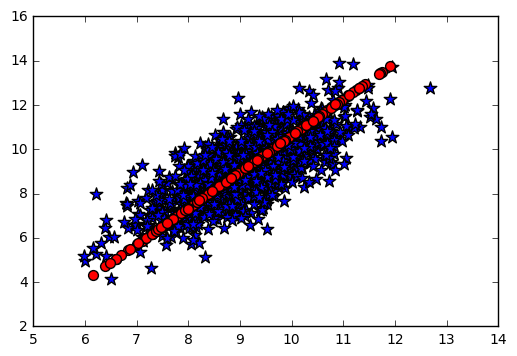

In [26]:
plt.scatter(dataArr[:,0], dataArr[:,1], marker='*', s= 90)
plt.scatter(reconDataArr[:,0], reconDataArr[:,1], marker='o', s=50, c='red')

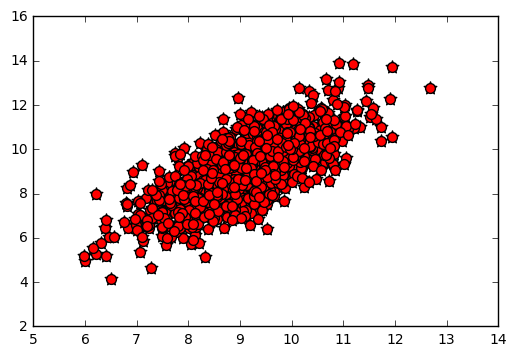

In [27]:
lowDDataArr, reconDataArr = pca(dataArr, 2)
plt.scatter(dataArr[:,0], dataArr[:,1], marker='*', s= 90)
plt.scatter(reconDataArr[:,0], reconDataArr[:,1], marker='o', s=50, c='red')

## apply pca to a real case step by step

In [28]:
# data cleaning
def replaceNaNWithMean(dataArr):
    numFeat = dataArr.shape[1]
    for i in range(numFeat):
        mean = np.mean( dataArr[ ~np.isnan(dataArr[:,i]), i] )
        dataArr[np.isnan(dataArr[:,i]), i] = mean
    
    return dataArr

In [29]:
dataArr = loadDataSet(DATA_DIR+'secom.data', ' ')
print(dataArr.shape)
dataCleanedArr = replaceNaNWithMean(dataArr)
print(dataCleanedArr.shape)

(1567, 590)
(1567, 590)


In [30]:
## pca

In [31]:
# remove mean
dataCleanedMeanRemovedArr = dataCleanedArr - dataCleanedArr.mean(axis=0) 

In [32]:
# covariation matrix
convArr = np.cov(dataCleanedMeanRemovedArr, rowvar=0)
print(convArr.shape)

(590, 590)


In [33]:
# calculate eigen value and vector
eigVals, eigVets = np.linalg.eig(np.mat(convArr))
print(eigVals.shape)
print(eigVets.shape)
print(eigVals)

(590,)
(590, 590)
[  5.34151979e+07   2.17466719e+07   8.24837662e+06   2.07388086e+06
   1.31540439e+06   4.67693557e+05   2.90863555e+05   2.83668601e+05
   2.37155830e+05   2.08513836e+05   1.96098849e+05   1.86856549e+05
   1.52422354e+05   1.13215032e+05   1.08493848e+05   1.02849533e+05
   1.00166164e+05   8.33473762e+04   8.15850591e+04   7.76560524e+04
   6.66060410e+04   6.52620058e+04   5.96776503e+04   5.16269933e+04
   5.03324580e+04   4.54661746e+04   4.41914029e+04   4.15532551e+04
   3.55294040e+04   3.31436743e+04   2.67385181e+04   1.47123429e+04
   1.44089194e+04   1.09321187e+04   1.04841308e+04   9.48876548e+03
   8.34665462e+03   7.22765535e+03   5.34196392e+03   4.95614671e+03
   4.23060022e+03   4.10673182e+03   3.41199406e+03   3.24193522e+03
   2.74523635e+03   2.35027999e+03   2.16835314e+03   1.86414157e+03
   1.76741826e+03   1.70492093e+03   1.66199683e+03   1.53948465e+03
   1.33096008e+03   1.25591691e+03   1.15509389e+03   1.12410108e+03
   1.03213798e+0

In [34]:
eigVals[:20]

array([ 53415197.85687517,  21746671.9046592 ,   8248376.61529075,
         2073880.85929397,   1315404.3877583 ,    467693.55734419,
          290863.55541772,    283668.60065106,    237155.82977109,
          208513.83582176,    196098.84856315,    186856.54901859,
          152422.35398714,    113215.03198428,    108493.84818587,
          102849.53283606,    100166.16423586,     83347.37616028,
           81585.05905974,     77656.05239293])

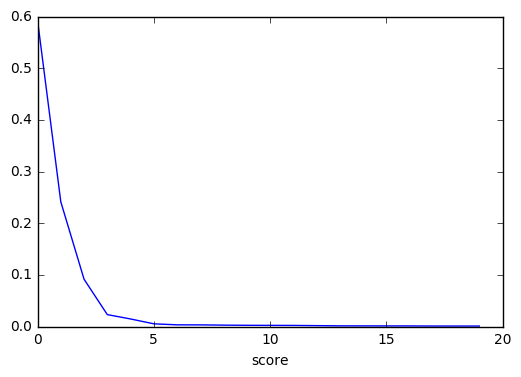

In [39]:
ratio = eigVals / sum(eigVals)
len(ratio)
plt.plot(ratio[:20])
plt.xlabel('index of features (sorted)')
plt.xlabel('score')

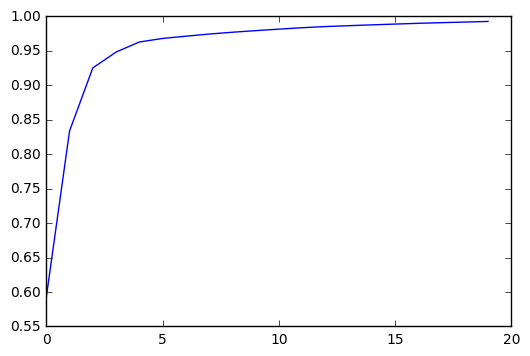

In [38]:
ratioCum = np.cumsum(ratio)
plt.plot(ratioCum[:20])